In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("data/supermarket.csv")

In [31]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

В этом задании вам необходимо написать скрипт, который сделает следующее:
1.	Поля Date и Time в основном датафрейме df будут приведены к типу datetime;

2.	Выведется наличие пропусков в датасете (по долям). При выводе ответа используйте сортировку поля с долей пропусков по убыванию.
В качестве ответа загрузите ваш код программы на Python.

In [33]:
df["Date"] = pd.to_datetime(df["Date"])

In [34]:
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [39]:
df.isna().mean().sort_values(ascending=False)

Invoice ID                 0.0
Total                      0.0
gross income               0.0
gross margin percentage    0.0
cogs                       0.0
Payment                    0.0
Time                       0.0
Date                       0.0
Tax 5%                     0.0
Branch                     0.0
Quantity                   0.0
Unit price                 0.0
Product line               0.0
Gender                     0.0
Customer type              0.0
City                       0.0
Rating                     0.0
dtype: float64

#### Задание 1. Напишите скрипт, который будет вычислять общий доход в разбивке по местоположению супермаркета (City) и в динамике. Чтобы отследить динамику изменения дохода (gross income) постройте график, отражающий суммарный доход в разрезе каждого магазина по датам.

Дайте ответы на вопросы, приведенные ниже.

Важно: для ввода ответа используйте строчные символы.

Вопрос 1. Запишите в поля ввода суммы дохода для каждого местоположения магазина. В качестве разделителя дробной и целой части используйте символ точки «.». 

In [40]:
df.groupby("City")["gross income"].sum()

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64

In [50]:
grouped_df = df.groupby(["City", "Date"])["gross income"].sum().reset_index()
grouped_df

,City,Date,gross income
0,Mandalay,2019-01-01,73.1760
1,Mandalay,2019-01-02,55.3715
2,Mandalay,2019-01-03,48.4140
3,Mandalay,2019-01-04,24.3135
4,Mandalay,2019-01-05,23.1790
...,...,...,...
258,Yangon,2019-03-26,56.5400
259,Yangon,2019-03-27,50.5060
260,Yangon,2019-03-28,78.7110
261,Yangon,2019-03-29,46.5530


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

Вопрос 2. Проанализируйте динамику суммарного изменения дохода (сумму поля gross income) по дням на графике. Почему мы не можем использовать графическое представление изменения дохода по дням для анализа данных?

Ответ

<Axes: xlabel='Date', ylabel='gross income'>

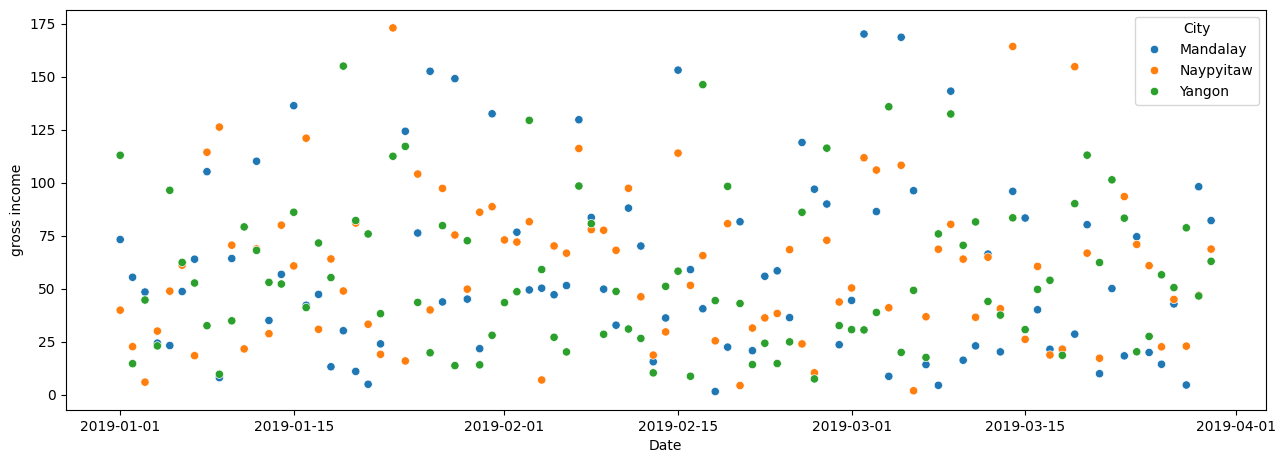

In [55]:
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
sns.scatterplot(grouped_df, x="Date", y="gross income", hue="City")

#### Задание 2. Используя ранее выполненные задания, проанализируйте динамику изменения суммы продаж по неделям для каждого расположения магазина.

Вопрос. Какой город имел максимальную недельную прибыль за рассмотренный в датасете период?

In [112]:
df["Week"] = df["Date"].dt.isocalendar().week

In [120]:
df.groupby(["City", "Week"])["cogs"].sum().reset_index().sort_values(
    by="cogs", ascending=False
)

,City,Week,cogs
8,Mandalay,9,12605.70
28,Yangon,3,10864.11
17,Naypyitaw,5,10526.87
35,Yangon,10,10023.00
37,Yangon,12,9775.23
29,Yangon,4,9731.06
15,Naypyitaw,3,9727.00
18,Naypyitaw,6,9668.58
16,Naypyitaw,4,9648.74
4,Mandalay,5,9487.28


#### Вопрос 1. Изучите количество купленных товаров по типу. Запишите в поле тип товара, который больше всего купили. 

In [121]:
df.groupby(["Product line"])["Quantity"].sum().sort_values(ascending=False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

#### Вопрос 2. Проанализируйте нормализованную долю покупателей-членов бонусной программы и нет. Результат округлите до трех знаков после запятой. Запишите в поля ввода долю каждой группы. В качестве разделителя дробной и целой части используйте символ точки «.».




In [81]:
df["Customer type"].value_counts(normalize=True)

Customer type
Member    0.501
Normal    0.499
Name: proportion, dtype: float64

#### Вопрос 3. Определите и запишите в поля для ввода средний чек по каждому платежному методу. Результат округлите до двух знаков после запятой. В качестве разделителя дробной и целой части используйте символ точки «.».

In [124]:
df.groupby("Payment")["Total"].mean().round(2)

Payment
Cash           326.18
Credit card    324.01
Ewallet        318.82
Name: Total, dtype: float64

#### Вопрос 4. Проанализируйте динамику среднего чека по каждому платежному методу понедельно. Запишите в поле ввода название платежного метода, имеющего наименьший средний чек на 3-й неделе.

In [84]:
weekly_df = df.copy()

In [86]:
weekly_df["Date"]

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [87]:
weekly_df["Week"] = weekly_df["Date"].dt.isocalendar().week

In [123]:
weekly_df[weekly_df["Week"] == 3].groupby(["Payment"])["gross income"].mean()

Payment
Cash           20.932917
Credit card    16.457571
Ewallet        13.438283
Name: gross income, dtype: float64

In [ ]:
df.groupby("Payment")["gross income"].mean().round(2)

Анализ признаков и геометрические вычисления для датасета Electric cars

В этом задании вы будете работать с датасетом, содержащим информацию об электромобилях — Electric cars.csv. 

Если вы занимаетесь разработкой модели анализа перспективности сегментов рынка или оценкой уровня страховки автомобилей, то вам может пригодиться проведение парного анализа признаков и выводы о возможности создания новых удобных признаков на основе анализа. В этом случае полезным будет предварительный анализ возможных комбинированных производных признаков, таких как площади, линии и другие геометрические фигуры.

Что необходимо сделать:

1.	Загрузить датасет и проанализировать его структуру.

2.	Построить график зависимости значений столбца PriceEuro от TopSpeed_KmH с помощью функции scatter библиотеки matplotlib.

3.	Подсчитать визуально количество вершин описывающего многоугольника.

4.	Определить, какую площадь имеет описывающий прямоугольник.

Описывающий многоугольник — выпуклый многоугольник, вершинами которого являются точки диаграммы, при этом все остальные вершины находятся внутри многоугольника. На рисунке ниже вы видите пример построения описывающего многоугольника (показан синим цветом) и описывающего прямоугольника (показан красным цветом).

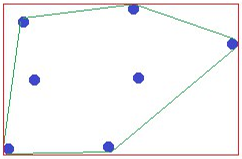

In [91]:
cars_df = pd.read_csv("data/Electric Car.csv")

In [92]:
cars_df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


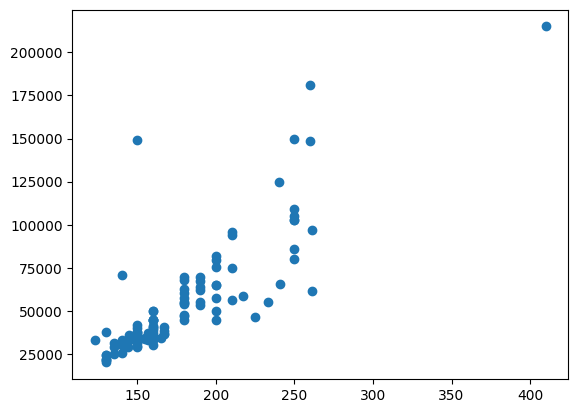

In [93]:
plt.scatter(cars_df["TopSpeed_KmH"], cars_df["PriceEuro"])

Категоризация данных датасета Electric cars

Напишите программу, выполняющую категоризацию данных датасета Electric cars.csv.

 

1.Используя модуль LabelEncoder из библиотеки sklearn, выполните кодирование категориального признака BodyStyle.

2.Найдите сумму полученных значений категориального признака и сохраните результат в переменную sum.

3.Найдите количество уникальных категорий полученного признака и сохраните результат в переменную cat_count.


In [94]:
from sklearn.preprocessing import LabelEncoder

In [103]:
cars_df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [106]:
encoder = LabelEncoder()
labeled_cars_df = cars_df.copy()
labeled_cars_df.loc[:, "BodyStyle"] = encoder.fit_transform(
    labeled_cars_df.loc[:, "BodyStyle"]
)
labeled_cars_df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,7,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,1,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,2,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,6,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,1,B,4,32997


In [109]:
sum = labeled_cars_df["BodyStyle"].sum()
cat_count = labeled_cars_df["BodyStyle"].nunique()

In [98]:
cars_df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
